In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import geopandas as gpd
from pywaffle import Waffle

from wordcloud import WordCloud , ImageColorGenerator
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FoodAnalysis/indian_food.csv')

In [9]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [10]:
data.tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


In [11]:
data.shape

(255, 9)

In [13]:
pd.unique(data['diet'])

array(['vegetarian', 'non vegetarian'], dtype=object)

In [14]:
pd.unique(data['course'])

array(['dessert', 'main course', 'starter', 'snack'], dtype=object)

In [15]:
pd.unique(data['flavor_profile'])

array(['sweet', 'spicy', 'bitter', '-1', 'sour'], dtype=object)

In [16]:
pd.unique(data['state'])

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [17]:
data = data.replace(-1, np.nan)
data = data.replace('-1', np.nan)

In [18]:
pd.unique(data['flavor_profile'])

array(['sweet', 'spicy', 'bitter', nan, 'sour'], dtype=object)

In [20]:
pd.unique(data['state'])

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', nan,
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [21]:
df = pd.DataFrame(data)

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Ingredients used in Indian desserts**

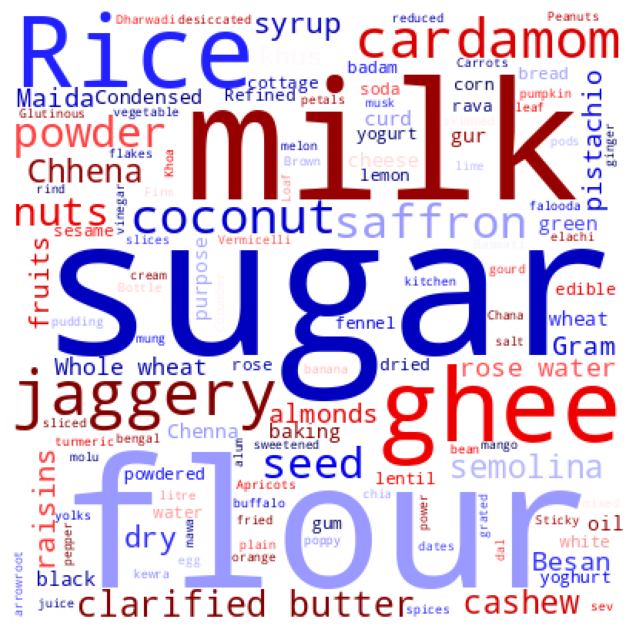

In [40]:
dessert_df  = df[df['course']=='dessert'].reset_index()

ingredients = []
for i in range(0,len(dessert_df)):
    text = dessert_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'seismic'
                      ,background_color ='white', 
                min_font_size = 8).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

**Ingredients used in South-Indian cuisine**

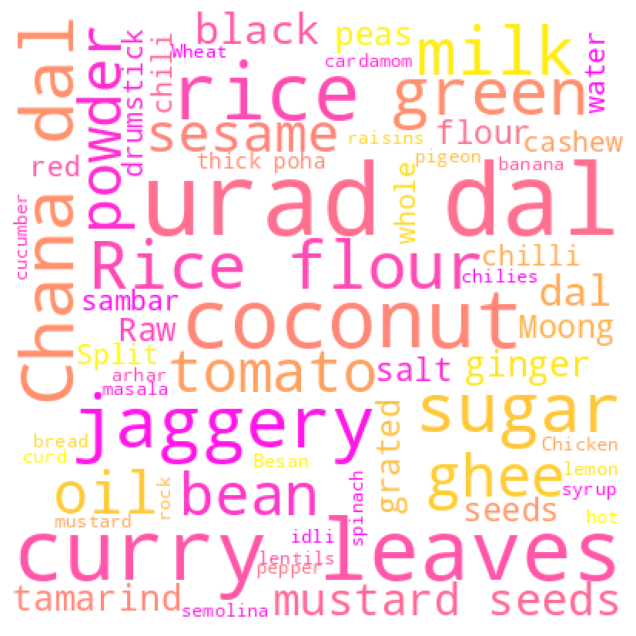

In [41]:
south_df = df[df['region']=='South'].reset_index()

ingredients = []
for i in range(0,len(south_df)):
    text = south_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 400, height = 400, colormap = 'spring'
                      ,background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

**Ingredients used in North-Indian cuisine**

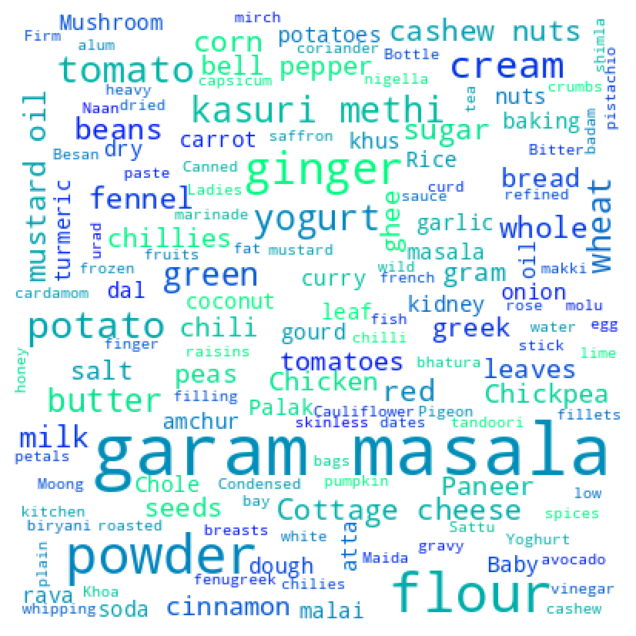

In [42]:
north_df = df[df['region']=='North'].reset_index()

ingredients = []
for i in range(0,len(north_df)):
    text = north_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'winter',
                      background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

**Ingredients used in Vegetarian food**

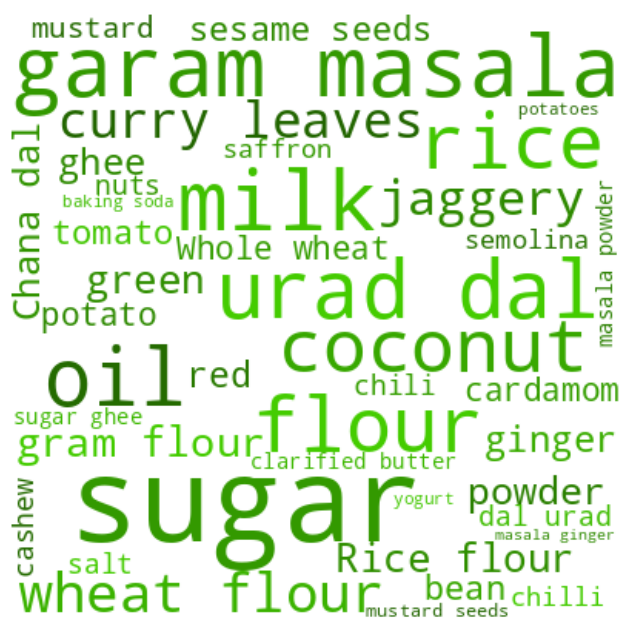

In [44]:
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 100%%, %d%%)" % random.randint(20, 40)


veg_df = df[df['diet']=='vegetarian'].reset_index()

ingredients = []
for i in range(0,len(veg_df)):
    text = veg_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")

plt.axis('off') 
plt.show()

**Ingredients used in Non Vegetarian food**

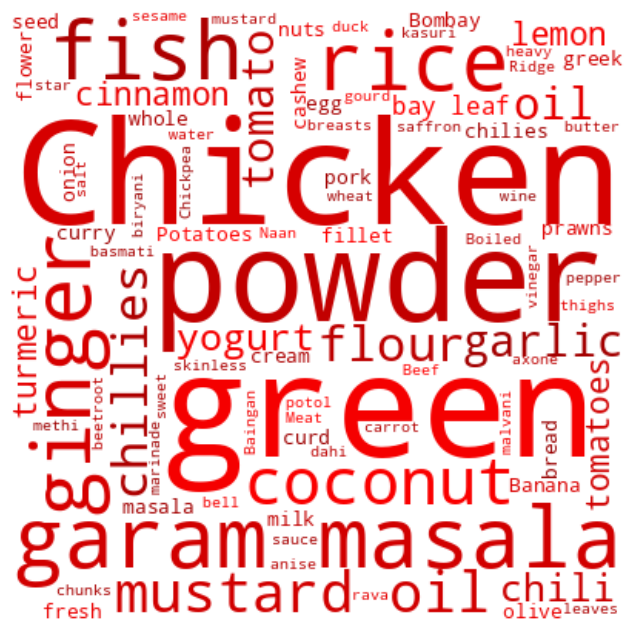

In [45]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(30, 50)


nveg_df = df[df['diet']=='non vegetarian'].reset_index()

ingredients = []
for i in range(0,len(nveg_df)):
    text = nveg_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 

default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3),
           interpolation="bilinear")

plt.axis('off') 
plt.show()